# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

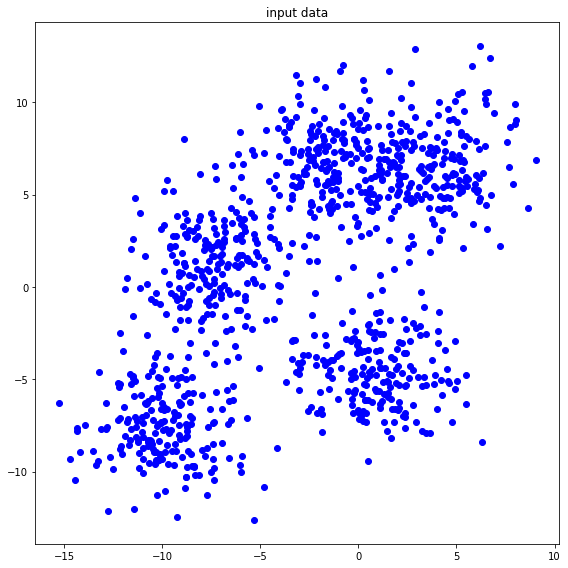

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x = feature[:,0]
    y = feature[:,1]
    distance=np.power((center[0]-x),2)+np.power((center[1]-y),2)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance
#compute_distance(feature,(0,0))

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #feature 1000 x 2 , label 1000 x 1 , value_label 1 x 1 , centroid: 1 x 2
    cnt = 0
    x=0
    y=0
    k= len(feature)
    for i in range(k):
        if label_feature[i] == label:
            x += feature[i][0]
            y += feature[i][1]
            cnt +=1
    centroid=[x/cnt,y/cnt]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid
compute_centroid(feature,np.ones(1000),1)

[-2.837387575431164, 0.5177705843081846]

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    k= len(distance)
    label_feature = np.ones(k, dtype=int)
    for i in range(k):
        label_feature[i]=np.argmin(distance[i])
        
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature
#k = np.array([[1,8],[10,8]])
#print(k.shape)
#compute_label(k)

## the number of clusters $K = 2$

In [7]:
number_cluster          = 2
number_iteration        = 20     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [8]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_feature = label_feature_02
for i in range(number_iteration):
    loss = 0
    distance=np.zeros([len(label_feature),number_cluster])
    for j in range(number_cluster):
        cnt = 0
        for t in range(len(label_feature)):
            if label_feature[t] == j:
                cnt += 1
        #print(cnt)
        if (cnt !=0):
        #print(compute_centroid(feature, label_feature, j))
        #print(centroid_iteration_02[i][j])
            centroid_iteration_02[i][j]=compute_centroid(feature, label_feature, j)
        else:
            centroid_iteration_02[i][j]= centroid_iteration_02[i-1][j]
        distance_j = compute_distance(feature, centroid_iteration_02[i][j])
        for k in range(len(label_feature)):
            distance[k][j] = distance_j[k]
    label_feature=compute_label(distance)
    for l in range(len(label_feature)):
        m=(feature[l]-centroid_iteration_02[i][label_feature[l]])
        #np.power(m)
        loss+=np.sum(np.power(m,2))
    loss= loss/len(label_feature)
    loss_iteration_02[i]=loss
label_feature_02=label_feature
#k=centroid_iteration_02[:,0,:]
#print(k)
#print(loss_iteration_02)
#print(label_feature)
    #distance = compute_distance(feature, centroid_iteration_02[i])
    
    
    
    



#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [9]:
number_cluster          = 4
number_iteration        = 20     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [10]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_feature = label_feature_04
for i in range(number_iteration):
    loss = 0
    distance=np.zeros([len(label_feature),number_cluster])
    for j in range(number_cluster):
        cnt = 0
        for t in range(len(label_feature)):
            if label_feature[t] == j:
                cnt += 1
        #print(cnt)
        if (cnt !=0):
        #print(compute_centroid(feature, label_feature, j))
        #print(centroid_iteration_02[i][j])
            centroid_iteration_04[i][j]=compute_centroid(feature, label_feature, j)
        else:
            centroid_iteration_04[i][j]= centroid_iteration_04[i-1][j]
        distance_j = compute_distance(feature, centroid_iteration_04[i][j])
        for k in range(len(label_feature)):
            distance[k][j] = distance_j[k]
    label_feature=compute_label(distance)
    for l in range(len(label_feature)):
        m=(feature[l]-centroid_iteration_04[i][label_feature[l]])
        #np.power(m)
        loss+=np.sum(np.power(m,2))
    loss= loss/len(label_feature)
    loss_iteration_04[i]=loss
label_feature_04=label_feature
print(loss_iteration_04)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

[64.63514028 20.209085   19.85907037 19.73686294 19.59779416 19.35370986
 18.59060763 15.61791192 11.26721448 10.58850968 10.58312917 10.58312917
 10.58312917 10.58312917 10.58312917 10.58312917 10.58312917 10.58312917
 10.58312917 10.58312917]


## the number of clusters $K = 8$

In [11]:
number_cluster          = 8
number_iteration        = 30     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [12]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_feature = label_feature_08
for i in range(number_iteration):
    loss = 0
    distance=np.zeros([len(label_feature),number_cluster])
    for j in range(number_cluster):
        cnt = 0
        for t in range(len(label_feature)):
            if label_feature[t] == j:
                cnt += 1
        #print(cnt)
        if (cnt !=0):
        #print(compute_centroid(feature, label_feature, j))
        #print(centroid_iteration_02[i][j])
            centroid_iteration_08[i][j]=compute_centroid(feature, label_feature, j)
        else:
            centroid_iteration_08[i][j]= centroid_iteration_08[i-1][j]
        distance_j = compute_distance(feature, centroid_iteration_08[i][j])
        for k in range(len(label_feature)):
            distance[k][j] = distance_j[k]
    label_feature=compute_label(distance)
    for l in range(len(label_feature)):
        m=(feature[l]-centroid_iteration_08[i][label_feature[l]])
        #np.power(m)
        loss+=np.sum(np.power(m,2))
    loss= loss/len(label_feature)
    loss_iteration_08[i]=loss
label_feature_08=label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [13]:
number_cluster          = 16
number_iteration        = 50     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [14]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_feature = label_feature_16
for i in range(number_iteration):
    loss = 0
    distance=np.zeros([len(label_feature),number_cluster])
    for j in range(number_cluster):
        cnt = 0
        for t in range(len(label_feature)):
            if label_feature[t] == j:
                cnt += 1
        #print(cnt)
        if (cnt !=0):
        #print(compute_centroid(feature, label_feature, j))
        #print(centroid_iteration_02[i][j])
            centroid_iteration_16[i][j]=compute_centroid(feature, label_feature, j)
        else:
            centroid_iteration_16[i][j]= centroid_iteration_16[i-1][j]
        distance_j = compute_distance(feature, centroid_iteration_16[i][j])
        for k in range(len(label_feature)):
            distance[k][j] = distance_j[k]
    label_feature=compute_label(distance)
    for l in range(len(label_feature)):
        m=(feature[l]-centroid_iteration_16[i][label_feature[l]])
        #np.power(m)
        loss+=np.sum(np.power(m,2))
    loss= loss/len(label_feature)
    loss_iteration_16[i]=loss
label_feature_16=label_feature


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [15]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [16]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [17]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [18]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [19]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [20]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [21]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(2):
        x=centroid_iteration_02[:,i,:]
        plt.plot(x[:,0],x[:,1],'-',label="cluster={0}".format(i))
    
    plt.scatter(centroid_iteration_02[0,::,0],centroid_iteration_02[0,::,1],marker='o',label="initial")
    plt.scatter(centroid_iteration_02[19,::,0],centroid_iteration_02[19,::,1],marker='s',label="final")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [24]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        x=centroid_iteration_04[:,i,:]
        plt.plot(x[:,0],x[:,1],'-',label="cluster={0}".format(i))
    
    plt.scatter(centroid_iteration_04[0,::,0],centroid_iteration_04[0,::,1],marker='o',label="initial")
    plt.scatter(centroid_iteration_04[19,::,0],centroid_iteration_04[19,::,1],marker='s',label="final")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        x=centroid_iteration_08[:,i,:]
        plt.plot(x[:,0],x[:,1],'-',label="cluster={0}".format(i))
    
    plt.scatter(centroid_iteration_08[0,::,0],centroid_iteration_08[0,::,1],marker='o',label="initial")
    plt.scatter(centroid_iteration_08[29,::,0],centroid_iteration_08[29,::,1],marker='s',label="final")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
        x=centroid_iteration_16[:,i,:]
        plt.plot(x[:,0],x[:,1],'-',label="cluster={0}".format(i))
    
    plt.scatter(centroid_iteration_16[0,::,0],centroid_iteration_16[0,::,1],marker='o',label="initial")
    plt.scatter(centroid_iteration_16[49,::,0],centroid_iteration_16[49,::,1],marker='s',label="final")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.scatter(feature[:,0], feature[:,1], c=label_feature_02, cmap=plt.cm.get_cmap('RdYlBu', 2))
    plt.colorbar(ticks=[0,1],label='cluster')
    plt.clim(-0.5,1.5) # color limit
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], c=label_feature_04, cmap=plt.cm.get_cmap('RdYlBu', 4))
    plt.colorbar(ticks=[0,1,2,3,4],label='cluster')
    plt.clim(-0.5,3.5) # color limit
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], c=label_feature_08, cmap=plt.cm.get_cmap('RdYlBu', 8))
    plt.colorbar(ticks=[0,1,2,3,4,5,6,7],label='cluster')
    plt.clim(-0.5,7.5) # color limit
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[:,0], feature[:,1], c=label_feature_16, cmap=plt.cm.get_cmap('RdYlBu', 16))
    plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],label='cluster')
    plt.clim(-0.5,15.5) # color limit
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1126288111
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.8951582347
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.1850605826
**************************************************
## [RESULT 05]
**************************************************


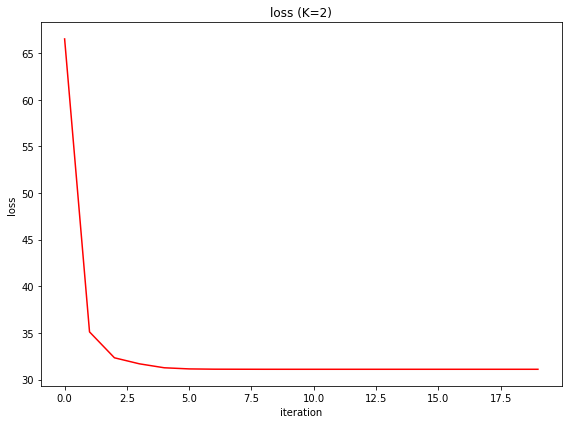

**************************************************
## [RESULT 06]
**************************************************


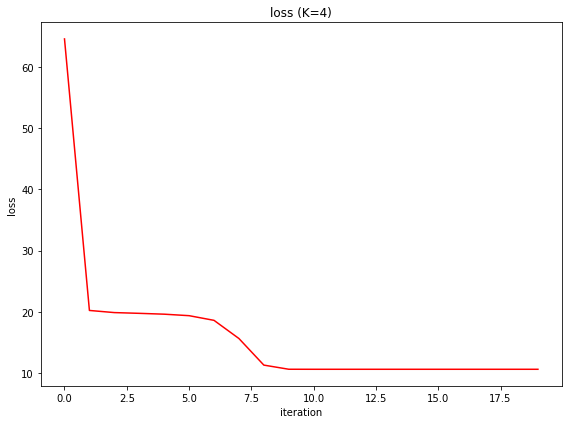

**************************************************
## [RESULT 07]
**************************************************


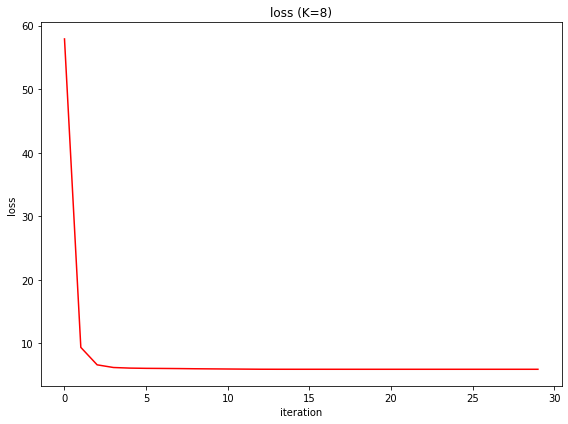

**************************************************
## [RESULT 08]
**************************************************


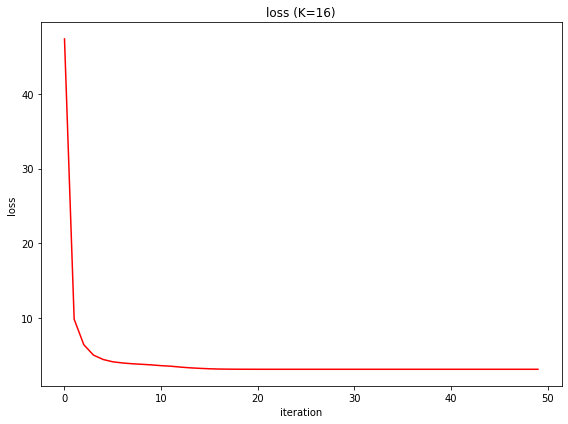

**************************************************
## [RESULT 09]
**************************************************


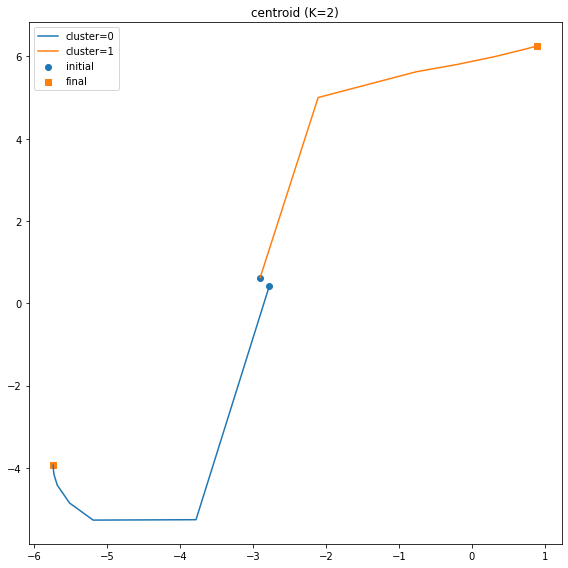

**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************


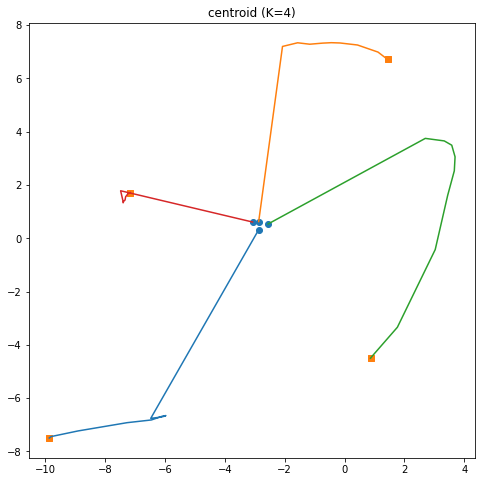

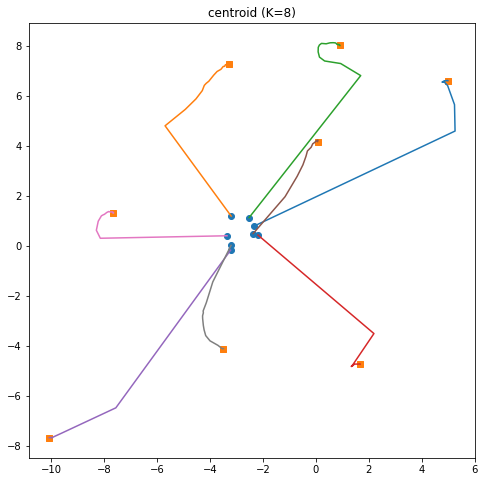

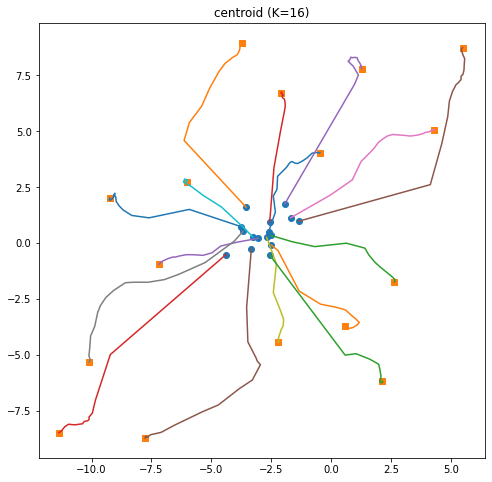

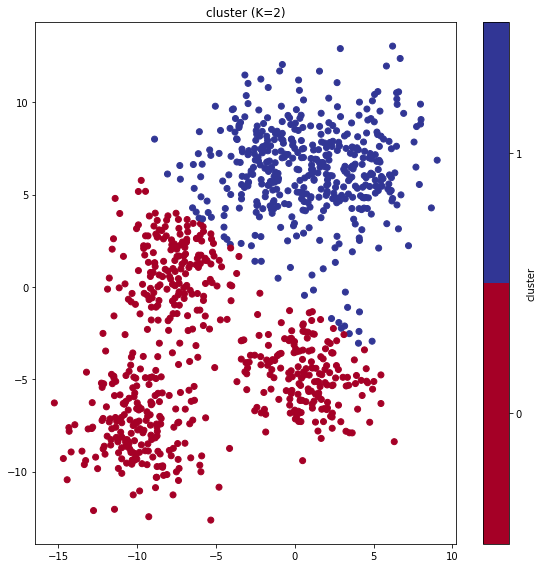

**************************************************
## [RESULT 14]
**************************************************


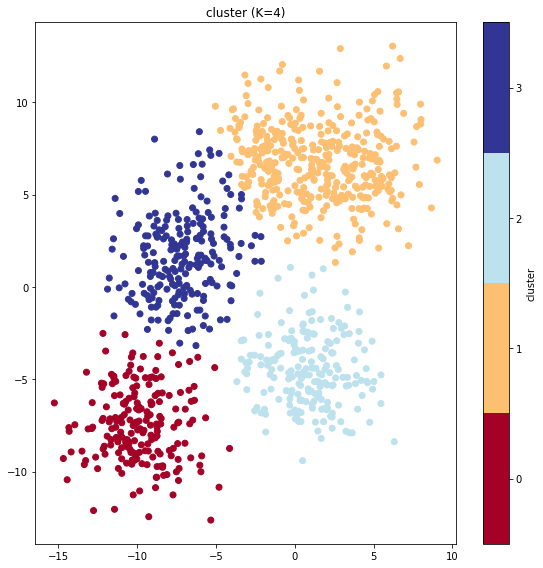

**************************************************
## [RESULT 15]
**************************************************


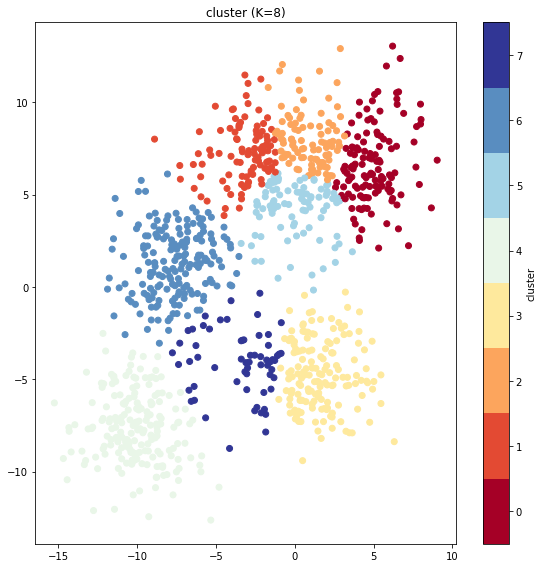

**************************************************
## [RESULT 16]
**************************************************


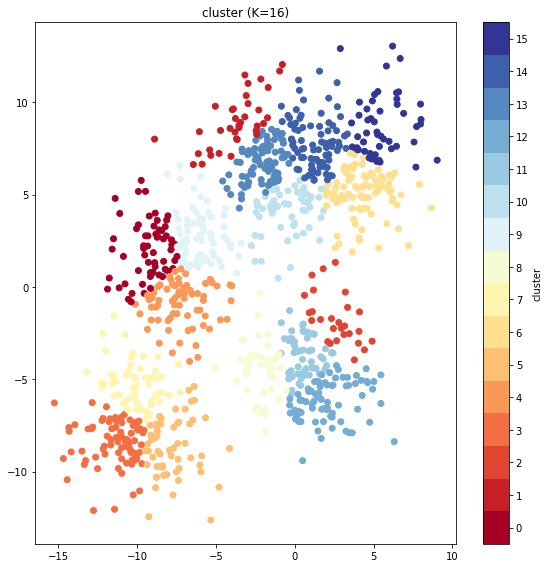

In [31]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)